## Exercise 1


###  1.1

**1.1.1 and 1.1.2** The first part of the exercise requires to evaluate $\langle r \rangle $ and $\sigma^2$ from a uniform distribution using Pseudo-Ramdom Number generator. The expercted values are:
$$\langle r \rangle = \int_0^1 r \ dr = \frac{1}{2} \quad \quad \sigma^2 = \int_0^1 (r-1/2)^2 \ dr = \frac{1}{12}$$
The two following graphs report the estimation of $\langle r \rangle $ and $\sigma^2$ as a function of the number of blocks using the data-blocking method. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import cauchy

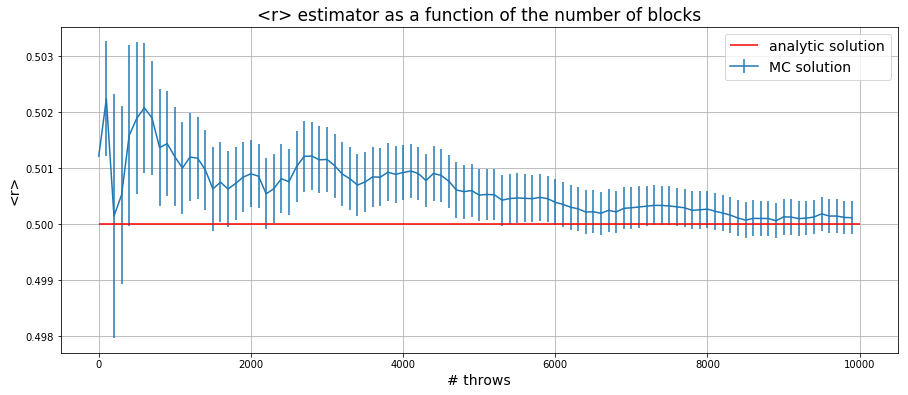

In [2]:
N=100
L=100
medie = np.loadtxt( './1.1/medie.dat',max_rows=N )
err = np.loadtxt( './1.1/errori.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,medie,yerr=err, label="MC solution")
plt.hlines(y=0.5, xmin=0, xmax=(N*L),label="analytic solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('<r>',size=14)
plt.title("<r> estimator as a function of the number of blocks", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)

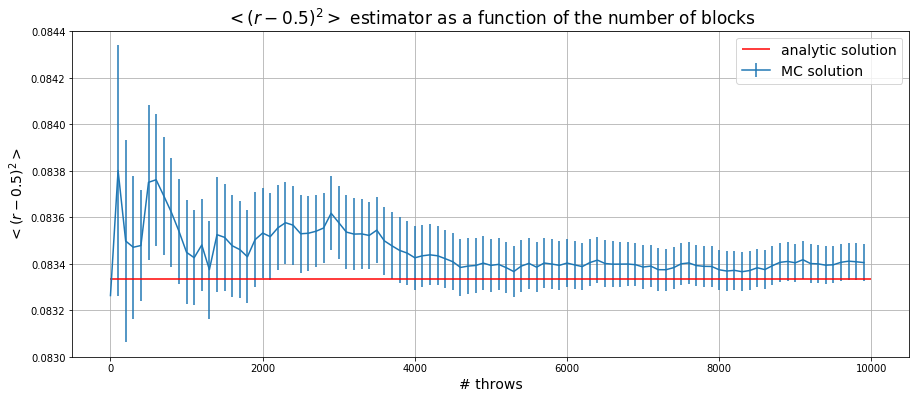

In [3]:
# sigma

N=100
L=100
sigma = np.loadtxt( './1.1/varianze2.dat',max_rows=N )
err = np.loadtxt( './1.1/errori_var2.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,sigma,yerr=err, label="MC solution")
plt.hlines(y=1./12., xmin=0, xmax=(N*L),label="analytic solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('$<(r -0.5)^2>$',size=14)
plt.title("$<(r -0.5)^2>$ estimator as a function of the number of blocks", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)

**1.1.3** In this exercise $\chi^2$ was evalued 100 times using $10^4$ values from a uniform distibution each time. As before, numbers are generated with the provided Pseudo-Random Number generator. The following graph reports the obtained values of $\chi^2$: as expected, $\chi^2$ values fluctuate around 100 (number of sub-intervals).

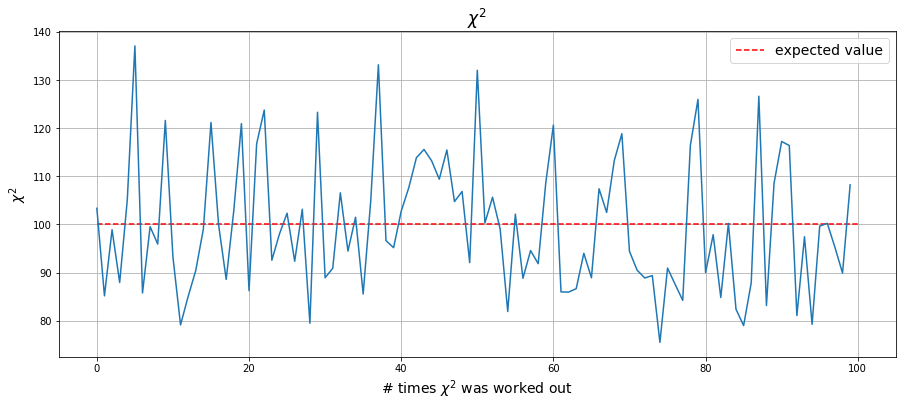

In [12]:
M=100
x=np.arange(M)
chi2_n = np.loadtxt( './1.1/chi_nuovo.dat',max_rows=M)

plt.figure(figsize=(15,6))
plt.plot(x,chi2_n)
plt.xlabel('# times $\chi^2$ was worked out',size=14) ##evaluated, worked out
plt.hlines(y=100, xmin=0, xmax=M,label="expected value", color = "red", linestyles='dashed')
plt.ylabel('$\chi^2$',size=14)
plt.title("$\chi^2$", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)

### 01.2 : Central Limit Theorem

**First step:** two probability distributions were added to the random.cpp using the inversion of the cumulative distribution. In general, this method could be summarised in the following passages:

p(x) distribution $\rightarrow$ calculate the cumulative distibution: $F(x) = \int_{-\infty}^x p(x)dx$ (note that this is a non-decreasing function of x) $\rightarrow$ invert the cumulative distribution: at this point, sampling a uniform distribution, the inverse of the cumulative distribution follows the p(x) distribution.

- exponential distribution $p(x) = \lambda e^{(-\lambda x)}$: in this case, the inverse of the cumulative function is: $f(y) = - \frac{1}{\lambda}ln(1-y)$;
- Cauchy-Lorentz distribution  $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$: in this case, the inverse of the cumulative function is: $\Gamma \big(\tan\big(y-\frac{1}{2}\big)\pi\big)+\mu$

**Second step:** the purpose of the excercise was to check the Central Limit Theorem: 3 histograms were obtained from $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$) being $x_i$ a random variable sampled throwing a standard dice (uniform distribution), an exponential dice ($\lambda=1$) and a Lorentzian dice  ($\mu=0$ and $\Gamma=1$). As the number of bins used to evaluate $S_N$ increases, the distribution of $S_N$ gets increasingly more similar to a gaussian distribution. The case $N=100$ was fitted using a Gaussian distribution.

In [7]:
M=10000
unif1 = np.loadtxt( './1.2/unif1_nuovo.dat',max_rows=M)
unif2 = np.loadtxt( './1.2/unif2_nuovo.dat',max_rows=M)
unif10 = np.loadtxt( './1.2/unif10_nuovo.dat',max_rows=M)
unif100 = np.loadtxt( './1.2/unif100_nuovo.dat',max_rows=M)

### Uniform distribution

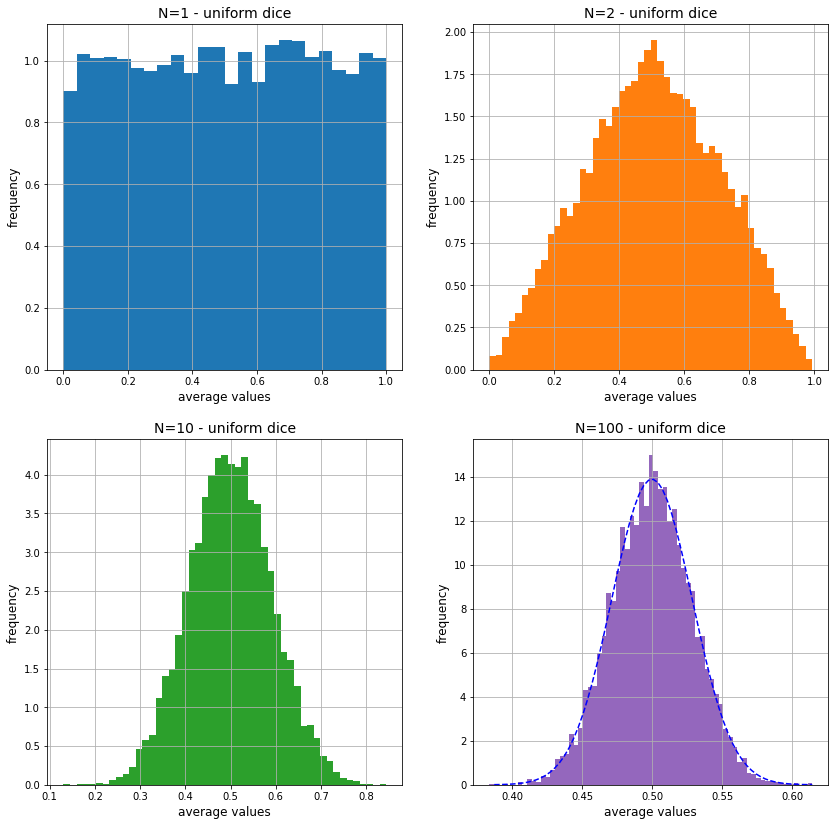

In [77]:
###uniform, fitting N=100#####
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))

ax1.hist(unif1, bins=np.linspace(min(unif1) , max(unif1), num=25), histtype='stepfilled', color="tab:blue",density=True)
ax1.set_xlabel('average values' , size=12)
ax1.set_ylabel('frequency', size=12)
ax1.set_title("N=1 - uniform dice", size=14)
ax1.grid(True)


ax2.hist(unif2, bins=50, histtype='stepfilled', color="tab:orange",density=True)
ax2.set_xlabel('average values' , size=12)
ax2.set_ylabel('frequency', size=12)
ax2.set_title("N=2 - uniform dice", size=14)
ax2.grid(True)

ax3.hist(unif10, bins=np.linspace(min(unif10) , max(unif10), num=50), histtype='stepfilled', color="tab:green",density=True)
ax3.set_xlabel('average values' , size=12)
ax3.set_ylabel('frequency', size=12)
ax3.set_title("N=10 - uniform dice", size=14)
ax3.grid(True)

# fit 2 (normalized)
bins5 = np.linspace(min(unif100), max(unif100), num=70)
mean,std=norm.fit(unif100)
x = np.delete(bins5,0)
y = norm.pdf(x, mean, std)
#print(mean, std)

ax4.hist(unif100, bins=bins5, density=True, histtype='stepfilled' , color="tab:purple")
ax4.plot(x,y,color='b', linestyle='dashed')
ax4.set_xlabel('average values' , size=12)
ax4.set_ylabel('frequency', size=12)
ax4.set_title("N=100 - uniform dice", size=14)
ax4.grid(True)


### Exponential dice

In [78]:
####exponential distribution, lambda=1######

M=10000
exp1 = np.loadtxt( './1.2/exp1_nuovo.dat',max_rows=M)
exp2 = np.loadtxt( './1.2/exp2_nuovo.dat',max_rows=M)
exp10 = np.loadtxt( './1.2/exp10_nuovo.dat',max_rows=M)
exp100 = np.loadtxt( './1.2/exp100_nuovo.dat',max_rows=M)

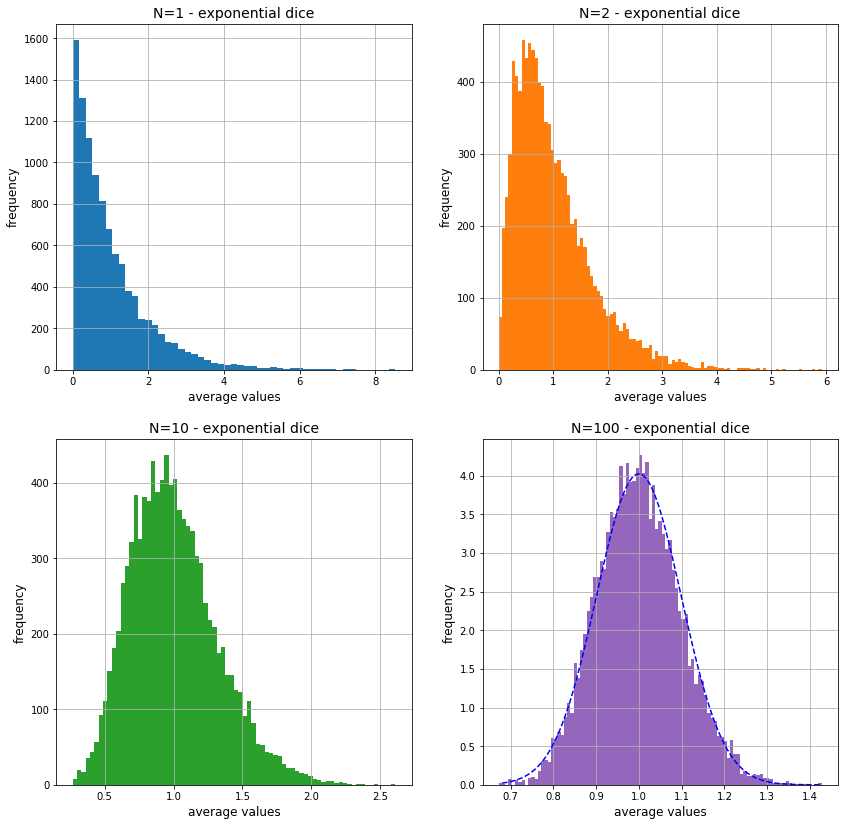

In [79]:
### fiiting N=100, normalized#######
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
#plt.suptitle("uniform dice", size=16)

ax1.hist(exp1, bins=np.linspace(min(exp1) , max(exp1), num=50), histtype='stepfilled', color="tab:blue")
ax1.set_xlabel('average values' , size=12)
ax1.set_ylabel('frequency', size=12)
ax1.set_title("N=1 - exponential dice", size=14)
ax1.grid(True)


ax2.hist(exp2, bins=np.linspace(min(exp2) , max(exp2), num=100), histtype='stepfilled', color="tab:orange")
ax2.set_xlabel('average values' , size=12)
ax2.set_ylabel('frequency', size=12)
ax2.set_title("N=2 - exponential dice", size=14)
ax2.grid(True)

ax3.hist(exp10, bins=np.linspace(min(exp10) , max(exp10), num=75), histtype='stepfilled', color="tab:green")
ax3.set_xlabel('average values' , size=12)
ax3.set_ylabel('frequency', size=12)
ax3.set_title("N=10 - exponential dice", size=14)
ax3.grid(True)

# prova fit 2 (normalized)
bins_exp = np.linspace(min(exp100), max(exp100), num=100)
mean,std=norm.fit(exp100)
x = np.delete(bins_exp,0)
y = norm.pdf(x, mean, std)
#print(mean, std)

ax4.hist(exp100, bins=bins_exp, density=True, histtype='stepfilled' , color="tab:purple")
ax4.plot(x,y,color='b', linestyle='dashed')
ax4.set_xlabel('average values' , size=12)
ax4.set_ylabel('frequency', size=12)
ax4.set_title("N=100 - exponential dice", size=14)
ax4.grid(True)

### Cauchy-Lorentz dice

In [80]:
####Cauchy-Lorentz distribution, gamma=1, mu=0######

M=10000
cauchy1 = np.loadtxt( './1.2/cauchy1_nuovo.dat',max_rows=M)
cauchy2 = np.loadtxt( './1.2/cauchy2_nuovo.dat',max_rows=M)
cauchy10 = np.loadtxt( './1.2/cauchy10_nuovo.dat',max_rows=M)
cauchy100 = np.loadtxt( './1.2/cauchy100_nuovo.dat',max_rows=M)

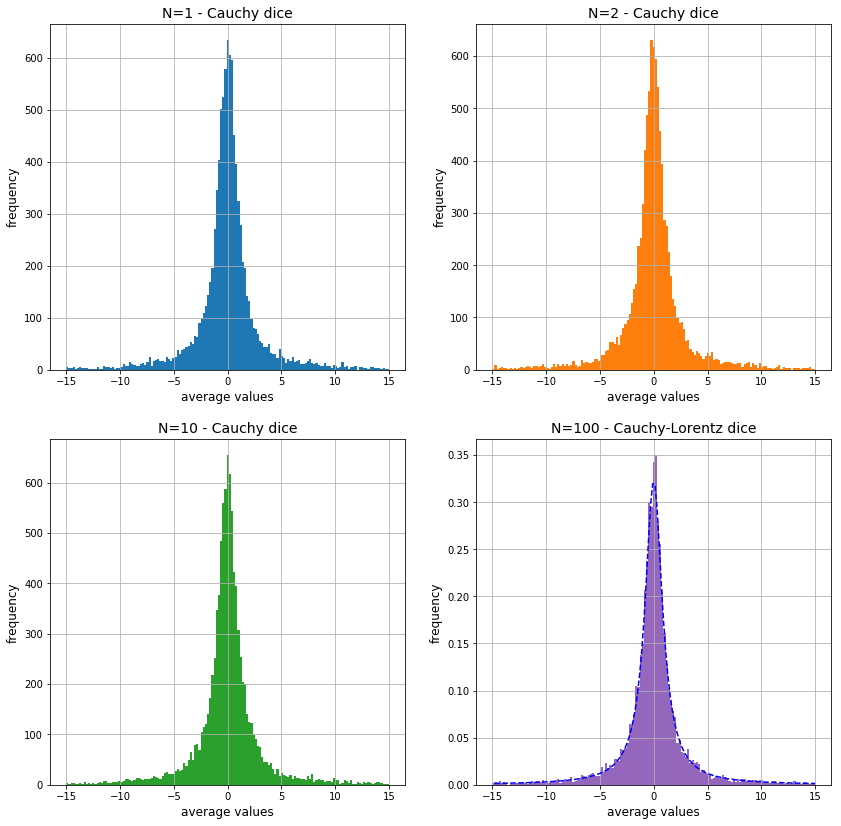

In [82]:
###fitting (normalized)#####
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
#plt.suptitle("uniform dice", size=16)
bins= np.linspace(-15,15,num=150)

ax1.hist(cauchy1, bins=bins, histtype='stepfilled', color="tab:blue")
ax1.set_xlabel('average values' , size=12)
ax1.set_ylabel('frequency', size=12)
ax1.set_title("N=1 - Cauchy dice", size=14)
ax1.grid(True)


ax2.hist(cauchy2,bins=bins, histtype='stepfilled', color="tab:orange")
ax2.set_xlabel('average values' , size=12)
ax2.set_ylabel('frequency', size=12)
ax2.set_title("N=2 - Cauchy dice", size=14)
ax2.grid(True)

ax3.hist(cauchy10, bins=bins, histtype='stepfilled', color="tab:green")
ax3.set_xlabel('average values' , size=12)
ax3.set_ylabel('frequency', size=12)
ax3.set_title("N=10 - Cauchy dice", size=14)
ax3.grid(True)

# fitting N=100 (normalized)
bins_cauchy = np.linspace(-15, 15, num=150)
mu,gamma=cauchy.fit(cauchy100)
x = np.delete(bins_cauchy,0)
y = cauchy.pdf(x, mu, gamma)
#print(mu, gamma)

ax4.hist(cauchy100, bins=bins_cauchy, density=True, histtype='stepfilled' , color="tab:purple")
ax4.plot(x,y,color='b', linestyle='dashed')
ax4.set_xlabel('average values' , size=12)
ax4.set_ylabel('frequency', size=12)
ax4.set_title("N=100 - Cauchy-Lorentz dice", size=14)
ax4.grid(True)

### 1.3: Buffon's experiment
The last exercise required to simulate the Buffon experiment to estimate of $\pi$.
#### Steps to calculate $\pi$:

Single experiment $\rightarrow$ throw L = $10^6$ times the needle:
- sample a uniform double x-center in $[0; d)$, which is the x-position of the center of the needle
- the distance from the nearest veritcal line is the minimum between d and the absolute value of (d - x-center)
- Using the accept-reject method, two  x and y were sampled uniformly on a quarter of the unit circumference $[0;\frac{\pi}{2})$: $tan(\frac{y}{x})$ represents the angle $\theta$ between the needle and the vertical line. In this way, the angle is sampled uniformly in $[0;\frac{\pi}{2})$. Moreover, $tan(x)$ is well defined within this interval.
- the needle hits the line if the distance from the nearest veritcal line is $< \frac{L}{2}sin(\theta)$
- evaluate $\pi$ as $\pi = \frac{2LN_{thr}}{N_{hit}d}$
- each experiment was ripeated N=100 times

The blocking method was used, with N=100 blocks. The graph shows the trend $\pi$ as a function of the number of blocks.

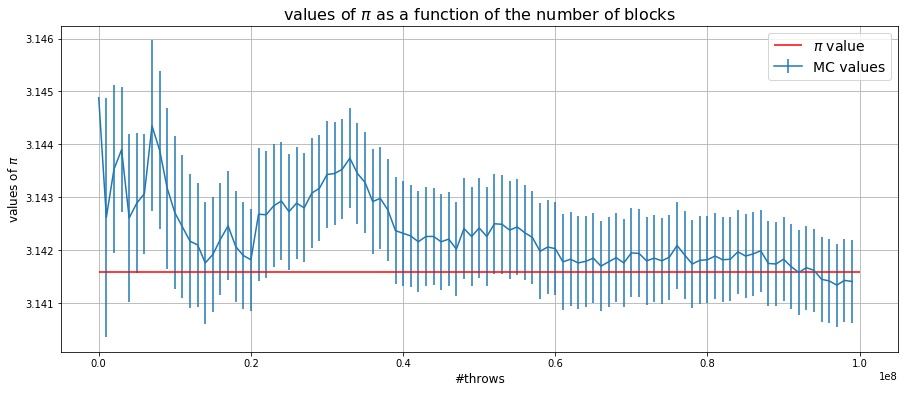

In [91]:
N = 100
L = int(1E6)
pi = np.loadtxt( './1.3/pi_forseok.dat',max_rows=N )
err = np.loadtxt( './1.3/err_pi_forseok.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,pi,yerr=err, label = "MC values")
plt.hlines(y=math.pi, xmin=0, xmax=N*L,label="$\pi$ value", color = "red")
plt.xlabel('#throws', size=12)
plt.ylabel('values of $\pi$' ,size=12)
plt.title("values of $\pi$ as a function of the number of blocks", size=16)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)
plt.show()

The estemated $\pi$ is compatible with the real $\pi$ value in the numpy library.